<a href="https://colab.research.google.com/github/ArnobRahee/A2AA/blob/main/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A** They are dependent (paired) because the same 400 stores are measured in two years (before vs after).

In [5]:
getwd()
list.files()

[1] "/content"

[1] "INTERNET ADVERTISE.dat"  "INTERNET ADVERTISE.txt" 
[3] "INTERNET ADVERTISE.xlsx" "sample_data"

In [6]:
df <- read.table("INTERNET ADVERTISE.txt",
                 header = TRUE,
                 sep = "",
                 fill = TRUE,
                 strip.white = TRUE)

names(df)
head(df)
dim(df)

[1] "This"   "Year"   "Last"   "Year.1"

,This,Year,Last,Year.1
,<dbl>,<dbl>,<lgl>,<lgl>
1,201.937,181.000,NA,NA
2,191.458,184.378,NA,NA
3,201.788,263.514,NA,NA
4,223.261,89.677,NA,NA
5,192.599,174.792,NA,NA
6,189.163,243.886,NA,NA


[1] 400   4

In [7]:
colnames(df) <- c("LastYear", "ThisYear")

In [8]:
dim(df)

[1] 400   4

In [9]:
names(df)
head(df, 10)
str(df)

[1] "LastYear" "ThisYear" NA         NA

,LastYear,ThisYear,NA,NA
,<dbl>,<dbl>,<lgl>,<lgl>
1,201.937,181.000,NA,NA
2,191.458,184.378,NA,NA
3,201.788,263.514,NA,NA
4,223.261,89.677,NA,NA
5,192.599,174.792,NA,NA
6,189.163,243.886,NA,NA
7,240.900,159.763,NA,NA
8,102.985,135.710,NA,NA
9,201.004,63.349,NA,NA


'data.frame':	400 obs. of  4 variables:
 $ LastYear: num  202 191 202 223 193 ...
 $ ThisYear: num  181 184.4 263.5 89.7 174.8 ...
 $ NA      : logi  NA NA NA NA NA NA ...
 $ NA      : logi  NA NA NA NA NA NA ...


In [10]:
num_df <- df[sapply(df, is.numeric)]

cat("Numeric columns found:\n")
print(names(num_df))
cat("\nHow many numeric columns?\n")
print(ncol(num_df))


Numeric columns found:
[1] "LastYear" "ThisYear"

How many numeric columns?
[1] 2


In [11]:
col_means <- sapply(num_df, mean, na.rm = TRUE)
chosen <- order(col_means, decreasing = TRUE)[1:2]

before <- num_df[[chosen[1]]]
after  <- num_df[[chosen[2]]]

cat("\nChosen numeric columns (likely the two years of sales):\n")
print(names(num_df)[chosen])

cat("\nMean of chosen col 1 =", mean(before, na.rm=TRUE), "\n")
cat("Mean of chosen col 2 =", mean(after, na.rm=TRUE), "\n")


Chosen numeric columns (likely the two years of sales):
[1] "LastYear" "ThisYear"

Mean of chosen col 1 = 191.2374 
Mean of chosen col 2 = 168.6777 


In [12]:
if (mean(after, na.rm=TRUE) < mean(before, na.rm=TRUE)) {
  temp <- after
  after <- before
  before <- temp
  cat("Swapped columns so AFTER has larger mean.\n")
}

cat("Final means:\n")
cat("Before mean =", mean(before, na.rm=TRUE), "\n")
cat("After  mean =", mean(after,  na.rm=TRUE), "\n")

Swapped columns so AFTER has larger mean.
Final means:
Before mean = 168.6777 
After  mean = 191.2374 


**B**

In [13]:
test_b <- t.test(after, before,
                 paired = TRUE,
                 alternative = "greater",
                 conf.level = 0.95)

cat("===== (b) Paired t-test (Ha: after > before) =====\n")
print(test_b)

cat("\n*** Highlight these on output ***\n")
cat("t statistic =", test_b$statistic, "\n")
cat("p-value     =", test_b$p.value, "\n")

cat("\nDecision at alpha = 0.05:\n")
if (test_b$p.value < 0.05) {
  cat("Reject H0: significant evidence internet advertising improves sales on average.\n")
} else {
  cat("Fail to reject H0: not enough evidence advertising improves sales on average.\n")
}

===== (b) Paired t-test (Ha: after > before) =====

	Paired t-test

data:  after and before
t = 6.4937, df = 399, p-value = 1.247e-10
alternative hypothesis: true mean difference is greater than 0
95 percent confidence interval:
 16.832    Inf
sample estimates:
mean difference 
       22.55968 


*** Highlight these on output ***
t statistic = 6.493676 
p-value     = 1.247047e-10 

Decision at alpha = 0.05:
Reject H0: significant evidence internet advertising improves sales on average.


**C**

In [17]:
test_c <- t.test(after, before, paired = TRUE)

cat("\n==============================\n")
cat("  95% CONFIDENCE INTERVAL\n")
cat("==============================\n")
print(test_c$conf.int)
cat("==============================\n")


  95% CONFIDENCE INTERVAL
[1] 15.72986 29.38951
attr(,"conf.level")
[1] 0.95


**D**

===== (d) Conditions for validity of paired t procedures =====

Condition 1 (Paired data):
- Each store must have TWO measurements: last year and this year.
- This is satisfied because the same 400 stores were measured twice.

Condition 2 (Independence of pairs):
- The differences from different stores should be independent.
- This is reasonable if the 400 stores were randomly sampled.

Condition 3 (Normality of differences OR large sample size):
- The paired t-test assumes the differences are approximately normal.
- With n = 400 , the Central Limit Theorem makes the t-test very robust.

Quick summary of differences (After - Before):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-194.66  -28.91   17.82   22.56   70.61  221.67 

Standard deviation of differences:
[1] 69.48201

NOTE for write-up:
- If the histogram/QQ plot look roughly symmetric with no extreme outliers,
  the normality condition is reasonable. With n=400, minor departures are fine.



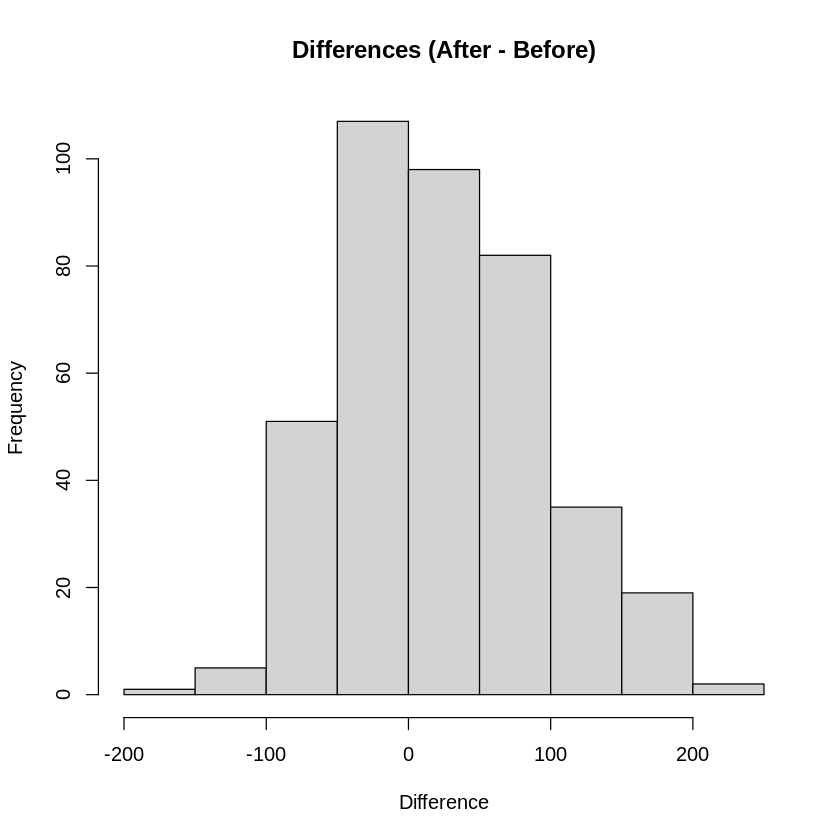

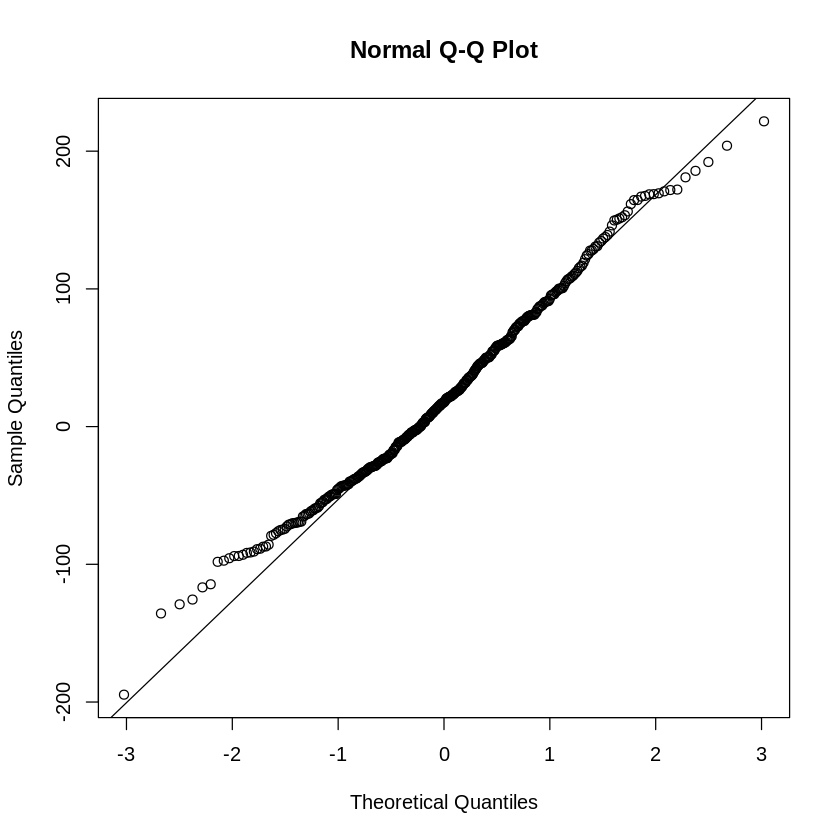

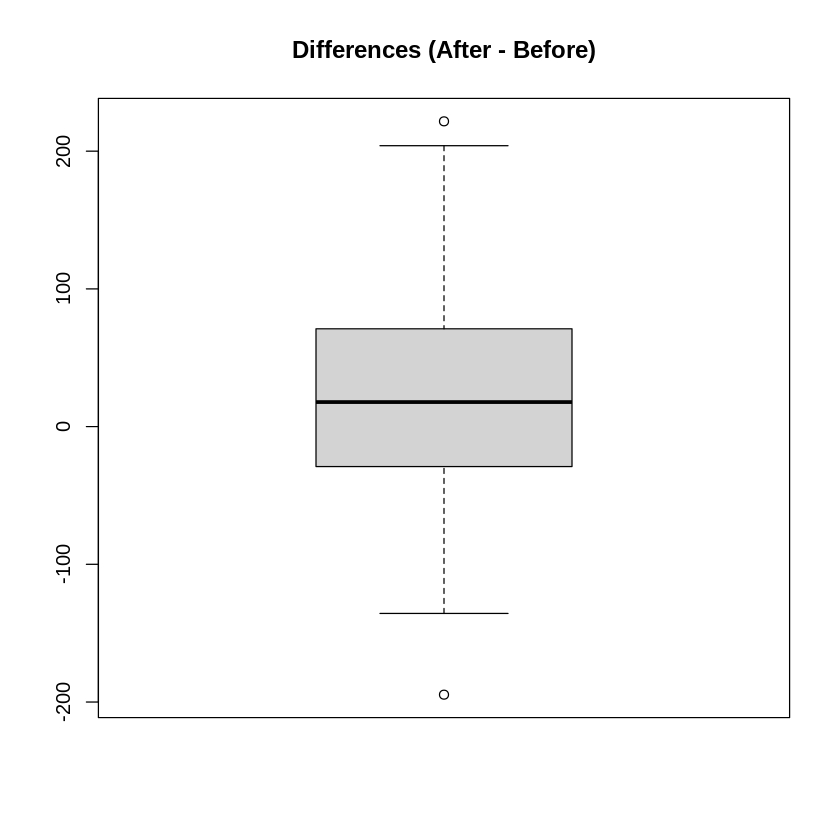

In [18]:
d <- after - before
n <- length(d)

cat("===== (d) Conditions for validity of paired t procedures =====\n\n")

cat("Condition 1 (Paired data):\n")
cat("- Each store must have TWO measurements: last year and this year.\n")
cat("- This is satisfied because the same 400 stores were measured twice.\n\n")

cat("Condition 2 (Independence of pairs):\n")
cat("- The differences from different stores should be independent.\n")
cat("- This is reasonable if the 400 stores were randomly sampled.\n\n")

cat("Condition 3 (Normality of differences OR large sample size):\n")
cat("- The paired t-test assumes the differences are approximately normal.\n")
cat("- With n =", n, ", the Central Limit Theorem makes the t-test very robust.\n\n")

cat("Quick summary of differences (After - Before):\n")
print(summary(d))

cat("\nStandard deviation of differences:\n")
print(sd(d, na.rm=TRUE))

cat("\nNOTE for write-up:\n")
cat("- If the histogram/QQ plot look roughly symmetric with no extreme outliers,\n")
cat("  the normality condition is reasonable. With n=400, minor departures are fine.\n\n")

hist(d, main="Differences (After - Before)", xlab="Difference")
qqnorm(d); qqline(d)
boxplot(d, main="Differences (After - Before)")

In [19]:
pdf("PartD_Assumption_Plots.pdf", width = 8, height = 10)

par(mfrow = c(3, 1))  # stack plots vertically

d <- after - before

hist(d,
     main = "Histogram of Differences (After - Before)",
     xlab = "Difference")

qqnorm(d, main = "Normal Q-Q Plot of Differences")
qqline(d)

boxplot(d,
        main = "Boxplot of Differences",
        horizontal = TRUE)

dev.off()

agg_record_962532379 
                   2